# Rentberry Rental Project

**Rentberry** facilitates the long-term home rental process for both tenants and landlords. It help tenants save time on apartment hunting and landlords get the right tenant and rental rates. Rentberry took care of each stage of the leasing process.

 * Discover all apartments available for long-term rent at reasonable prices

 * Discover all single-family houses available for long-term rent reasonable prices

## Import necessary libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [2]:
# Import table 1
table1 = pd.read_csv('table1.csv')

# Import table 2
table2 = pd.read_csv('table2.csv')

# Import table 3
table3 = pd.read_csv('table3.csv')

In [3]:
# Checking table 1
print(table1.shape)

table1.head()

(5880, 8)


,Unnamed: 0,Sno,Address,City,State code,Country,Rentel_price,Deposit
0,0,0,"Austin, TX",TX,NaN,USA,$ 29340,NaN
1,1,1,801 West 5th Street,NaN,NaN,USA,$ 2620,NaN
2,2,2,"Austin, Indian Oaks, TX, US",Indian Oaks,TX,US,$ 1460,NaN
3,3,3,5505 Avenue H,NaN,NaN,USA,$ 3350,1600.0
4,4,4,"Seaholm Residences, 222 West Avenue, Austin, T...",Austin,TX 78701,USA,$ 7000,NaN


In [4]:
# Checking table 2
print(table2.shape)

table2.head()

(5880, 6)


,Unnamed: 0,Sno,No_of_bed,No_of_bathroom,Area,Pets
0,0,0,7 Bed,7 Bath,"3,550 Sq Ft",No
1,1,1,1 Bed,1 Bath,NaN,Yes
2,2,2,3 Bed,2 Bath,"1,352 Sq Ft",Yes
3,3,3,3 Bed,1 Bath,"1,300 Sq Ft",Yes
4,4,4,2 Bed,2 Bath,"1,360 Sq Ft",NaN


In [5]:
# Checking table 3
print(table3.shape)

table3.head()

(5880, 10)


,Unnamed: 0,Sno,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Roofdeck,Storage
0,0,0,No,Yes,Yes,No,Yes,No,No,No
1,1,1,No,No,No,No,No,No,No,No
2,2,2,No,No,No,No,No,No,No,No
3,3,3,No,Yes,No,No,Yes,Yes,No,Yes
4,4,4,No,No,No,No,No,No,No,No


### Now make only 1 dataframe of 3 table csv file using pandas concat

In [6]:
df = pd.concat([table1,table2,table3],axis=1)

df.head()

,Unnamed: 0,Sno,Address,City,State code,Country,Rentel_price,Deposit,Unnamed: 0,Sno,...,Unnamed: 0,Sno,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Roofdeck,Storage
0,0,0,"Austin, TX",TX,NaN,USA,$ 29340,NaN,0,0,...,0,0,No,Yes,Yes,No,Yes,No,No,No
1,1,1,801 West 5th Street,NaN,NaN,USA,$ 2620,NaN,1,1,...,1,1,No,No,No,No,No,No,No,No
2,2,2,"Austin, Indian Oaks, TX, US",Indian Oaks,TX,US,$ 1460,NaN,2,2,...,2,2,No,No,No,No,No,No,No,No
3,3,3,5505 Avenue H,NaN,NaN,USA,$ 3350,1600.0,3,3,...,3,3,No,Yes,No,No,Yes,Yes,No,Yes
4,4,4,"Seaholm Residences, 222 West Avenue, Austin, T...",Austin,TX 78701,USA,$ 7000,NaN,4,4,...,4,4,No,No,No,No,No,No,No,No


In [7]:
# Drop unwanted columns
df.drop(columns=['Unnamed: 0','Unnamed: 0','Unnamed: 0','Sno','Sno','Sno'],inplace=True)

In [8]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])

df.head()

No. of Rows : 5880
No. of Columns : 18


,Address,City,State code,Country,Rentel_price,Deposit,No_of_bed,No_of_bathroom,Area,Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Roofdeck,Storage
0,"Austin, TX",TX,NaN,USA,$ 29340,NaN,7 Bed,7 Bath,"3,550 Sq Ft",No,No,Yes,Yes,No,Yes,No,No,No
1,801 West 5th Street,NaN,NaN,USA,$ 2620,NaN,1 Bed,1 Bath,NaN,Yes,No,No,No,No,No,No,No,No
2,"Austin, Indian Oaks, TX, US",Indian Oaks,TX,US,$ 1460,NaN,3 Bed,2 Bath,"1,352 Sq Ft",Yes,No,No,No,No,No,No,No,No
3,5505 Avenue H,NaN,NaN,USA,$ 3350,1600.0,3 Bed,1 Bath,"1,300 Sq Ft",Yes,No,Yes,No,No,Yes,Yes,No,Yes
4,"Seaholm Residences, 222 West Avenue, Austin, T...",Austin,TX 78701,USA,$ 7000,NaN,2 Bed,2 Bath,"1,360 Sq Ft",NaN,No,No,No,No,No,No,No,No


In the dataset we see that all are categorical columns but only Rental Price and Deposit has numerical columns and the dataset has 5880 rows and 21 columns.

In [9]:
# Checking the columns in the dataset
df.columns

Index(['Address', 'City', 'State code', 'Country', 'Rentel_price', 'Deposit',
       'No_of_bed', 'No_of_bathroom', 'Area', 'Pets', 'Washer/Dryer',
       'Air_Conditioning', 'Parking', 'Fireplace', 'Dishwasher',
       'Hardwood_floor', 'Roofdeck', 'Storage'],
      dtype='object')

In [10]:
# Checking the columns name and its dtype and its count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           5808 non-null   object 
 1   City              5141 non-null   object 
 2   State code        4116 non-null   object 
 3   Country           5822 non-null   object 
 4   Rentel_price      5807 non-null   object 
 5   Deposit           735 non-null    float64
 6   No_of_bed         5808 non-null   object 
 7   No_of_bathroom    5422 non-null   object 
 8   Area              3420 non-null   object 
 9   Pets              2478 non-null   object 
 10  Washer/Dryer      5880 non-null   object 
 11  Air_Conditioning  5880 non-null   object 
 12  Parking           5880 non-null   object 
 13  Fireplace         5880 non-null   object 
 14  Dishwasher        5880 non-null   object 
 15  Hardwood_floor    5880 non-null   object 
 16  Roofdeck          5880 non-null   object 


We see that only 1 columns has float64 and all other columns has object datatypes.

In [11]:
# checking the duplicates value in the dataset
df.duplicated().sum()

131

There are 45 duplicates values so we can remove those values.

In [12]:
# Drop duplicates values
df.drop_duplicates(inplace=True)

df.shape

(5749, 18)

In [13]:
# Checking the missing values in the dataset
df.isnull().sum()

Address                4
City                 670
State code          1693
Country               51
Rentel_price           5
Deposit             5021
No_of_bed              4
No_of_bathroom       382
Area                2367
Pets                3290
Washer/Dryer           0
Air_Conditioning       0
Parking                0
Fireplace              0
Dishwasher             0
Hardwood_floor         0
Roofdeck               0
Storage                0
dtype: int64

We see that many of columns has missing values. So we drop those columns but in pet columns they missing values means that Not pets allowed. We see that area columns has 40% missing values but area has import for predict rental price and we filled so give totally incorrect predict. So we remove some columns and remove some rows which has missing values.

In [14]:
# Drop those columns which has missing values more than 50% 
df = df.drop(columns=['Deposit','State code'],axis=1)

df.isnull().sum()

Address                4
City                 670
Country               51
Rentel_price           5
No_of_bed              4
No_of_bathroom       382
Area                2367
Pets                3290
Washer/Dryer           0
Air_Conditioning       0
Parking                0
Fireplace              0
Dishwasher             0
Hardwood_floor         0
Roofdeck               0
Storage                0
dtype: int64

We seem that some columms has lot of missing values so we the all the misisng values in same rows.

In [15]:
df['Pets'].value_counts()

Pets
No                1448
Yes                931
€1,492 Deposit       4
€1,455 Deposit       4
€1,080 Deposit       2
                  ... 
€1,042 Deposit       1
€1,162 Deposit       1
€1,110 Deposit       1
€995 Deposit         1
€2,250 Deposit       1
Name: count, Length: 69, dtype: int64

Seems some unwanted values in Pets columns

In [16]:
# Seems some unwanted values in Pets columns we replace with np.nan

df['Pets'] = df['Pets'].str.replace(',', '',regex=True)

df['Pets'] = df['Pets'].str.replace(r'(\W\d+\s\w+)','NaN',regex=True)

df['Pets'] = df['Pets'].replace({'NaN':np.NaN})

df['Pets'] = df['Pets'].fillna(df['Pets'].mode()[0])

In [17]:
df['Pets'].value_counts()

Pets
No     4818
Yes     931
Name: count, dtype: int64

In [18]:
# Drop all the mising value 
df = df.dropna(how='any')
df.reset_index(drop=True,inplace=True)
df.shape

(2981, 16)

In [19]:
df

,Address,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area,Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Roofdeck,Storage
0,"Austin, TX",TX,USA,$ 29340,7 Bed,7 Bath,"3,550 Sq Ft",No,No,Yes,Yes,No,Yes,No,No,No
1,"Austin, Indian Oaks, TX, US",Indian Oaks,US,$ 1460,3 Bed,2 Bath,"1,352 Sq Ft",Yes,No,No,No,No,No,No,No,No
2,"Seaholm Residences, 222 West Avenue, Austin, T...",Austin,USA,$ 7000,2 Bed,2 Bath,"1,360 Sq Ft",No,No,No,No,No,No,No,No,No
3,"7716 Earp Way, Williamson County, TX 78729, USA",Williamson County,USA,$ 2400,3 Bed,2.5 Bath,"1,867 Sq Ft",No,No,No,No,No,No,No,No,No
4,"8032 Izetta Lane, Travis County, TX 78744, USA",Travis County,USA,$ 2495,3 Bed,2.5 Bath,"1,907 Sq Ft",No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,"The Flag, Baslerstrasse 100, 8048 Zurich, Swit...",Zurich,Switzerland,CHF 2793,1 Bed,1 Bath,18 m,No,Yes,No,Yes,No,No,No,No,Yes
2977,"Okenstrasse 7, 8037 Zurich, Switzerland",Zurich,Switzerland,CHF 3343,Studio,1 Bath,40 m,Yes,Yes,No,Yes,No,No,No,No,No
2978,"8001 Zurich, Switzerland",Zurich,Switzerland,CHF 9159,Studio,1 Bath,237 Sq Ft,Yes,No,No,No,No,No,No,No,No
2979,"Migration office of Canton Zurich, Berninastra...",Zurich,Switzerland,CHF 5780,1 Bed,1 Bath,344 Sq Ft,Yes,No,No,No,No,Yes,No,No,No


In [20]:
# Checking missing values again
df.isnull().sum()

Address             0
City                0
Country             0
Rentel_price        0
No_of_bed           0
No_of_bathroom      0
Area                0
Pets                0
Washer/Dryer        0
Air_Conditioning    0
Parking             0
Fireplace           0
Dishwasher          0
Hardwood_floor      0
Roofdeck            0
Storage             0
dtype: int64

In [21]:
# Checking the unique values in each columns
df.nunique().to_frame('No of unique values')

,No of unique values
Address,2115
City,287
Country,16
Rentel_price,1494
No_of_bed,14
No_of_bathroom,15
Area,1317
Pets,2
Washer/Dryer,2
Air_Conditioning,2


We can observe that Roofdeck only 1 values.

In [22]:
# Checking values count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Address
Honolulu, HI                                                                      81
Nashville-Davidson, TN                                                            55
Athens, Central Athens, Greece                                                    45
Fort Myers, FL                                                                    32
Miami, FL                                                                         32
                                                                                  ..
3507 Storks Bundle Lane, North Las Vegas, NV 89084, USA                            1
1378 Red Gable Lane, Las Vegas, NV 89144, USA                                      1
4206 West Fortune Avenue, Las Vegas, NV 89107, USA                                 1
9000 Rivers Edge Drive, Las Vegas, NV 89117, USA                                   1
Migration office of Canton Zurich, Berninastrasse 45, 8057 Zurich, Switzerland     1
Name: count, Length: 2115, dtype: int64


City
 FL       

We observe that in city and country columns Some name are in sort form and rental column price has different currency and area some columns are has sq ft and some has meter and Roofdeck has only 1 value No.

In [23]:
# Drop unwante columns 
df.drop(columns=['Address','Roofdeck'],inplace=True)

df.shape

(2981, 14)

We can drop those Address which has not use in prediction and Roofdeck which has only one value No.

### Clean the columns one by one

## City

In [24]:
df['City'].str.extract(r'([A-Z]{2})',expand=True).value_counts()

FL    107
CA    103
HI     90
AZ     65
TN     55
TX     38
PA     26
NY     20
NJ     14
NC     12
TW      1
Name: count, dtype: int64

In [25]:
# Replace stort value to Nan in City columns 
df['City'] = df['City'].str.replace(r'([A-Z]{2})','Nan',regex=True)

# Replace Nan with Np.NaN 
df['City'] = df['City'].replace(' Nan',np.NaN)

In [26]:
df[df['City'].isin([np.NaN])]

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area,Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,NaN,USA,$ 29340,7 Bed,7 Bath,"3,550 Sq Ft",No,No,Yes,Yes,No,Yes,No,No
5,NaN,USA,$ 868,1 Bed,1 Bath,675 Sq Ft,Yes,No,No,No,No,No,No,No
6,NaN,USA,$ 10200,2 Bed,2 Bath,850 Sq Ft,No,No,Yes,Yes,No,Yes,No,No
7,NaN,USA,$ 4740,1 Bed,1 Bath,825 Sq Ft,Yes,No,Yes,Yes,No,Yes,No,No
13,NaN,USA,$ 4710,3 Bed,2 Bath,"1,260 Sq Ft",No,No,Yes,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,NaN,USA,$ 13890,1 Bed,1 Bath,350 Sq Ft,No,No,Yes,Yes,No,No,No,No
1842,NaN,USA,$ 5100,2 Bed,1 Bath,398 Sq Ft,Yes,No,Yes,Yes,No,Yes,No,No
1843,NaN,USA,$ 18000,5 Bed,4 Bath,"2,500 Sq Ft",No,No,No,Yes,No,Yes,No,No
1846,NaN,USA,$ 4170,2 Bed,2 Bath,"1,051 Sq Ft",Yes,No,Yes,Yes,No,Yes,No,No


We seem that all NaN value are city which belong to USA Country.

In [27]:
df1 = df[df['Country'].isin([' USA'])]

In [28]:
# Fillling missing values
df1['City'].fillna(df1['City'].mode()[0],inplace=True)

df.update(df1)

df['City'].isnull().sum()

0

## Country

In [29]:
df['Country'].value_counts()

Country
 USA               1845
 Germany            273
 Mexico             116
 Netherlands        109
 Greece             101
 Austria             96
 Switzerland         93
 Canada              92
 Spain               88
 Ireland             61
Spain                38
 Poland              35
Ireland              11
 United Kingdom      10
 Norway              10
 US                   3
Name: count, dtype: int64

We observe that US has A is missing and also all mostly country name starting with white space.

In [30]:
# Replace US to USA
df['Country'].replace({' US':' USA'},inplace=True)

df['Country'].value_counts()

Country
 USA               1848
 Germany            273
 Mexico             116
 Netherlands        109
 Greece             101
 Austria             96
 Switzerland         93
 Canada              92
 Spain               88
 Ireland             61
Spain                38
 Poland              35
Ireland              11
 United Kingdom      10
 Norway              10
Name: count, dtype: int64

We can replace US into USA.

In [31]:
# Remove the space starting with country name.
df['Country'].replace({' USA':'USA'},inplace=True)
df['Country'].replace({' Germany':'Germany'},inplace=True)
df['Country'].replace({' Mexico':'Mexico'},inplace=True)
df['Country'].replace({' Netherlands':'Netherlands'},inplace=True)
df['Country'].replace({' Canada':'Canada'},inplace=True)
df['Country'].replace({' Greece':'Greece'},inplace=True)
df['Country'].replace({' Austria':'Austria'},inplace=True)
df['Country'].replace({' Switzerland':'Switzerland'},inplace=True)
df['Country'].replace({' Spain':'Spain'},inplace=True)
df['Country'].replace({' Ireland':'Ireland'},inplace=True)
df['Country'].replace({' Poland':'Poland'},inplace=True)
df['Country'].replace({' United Kingdom':'United Kingdom'},inplace=True)
df['Country'].replace({' Norway':'Norway'},inplace=True)

df['Country'].value_counts()

Country
USA               1848
Germany            273
Spain              126
Mexico             116
Netherlands        109
Greece             101
Austria             96
Switzerland         93
Canada              92
Ireland             72
Poland              35
United Kingdom      10
Norway              10
Name: count, dtype: int64

## No of Bedroom

In [32]:
df['No_of_bed'].value_counts()

No_of_bed
       2        Bed          848
       3        Bed          723
       1        Bed          621
       4        Bed          350
              Studio         262
       5        Bed          103
       6        Bed           35
       7        Bed           14
       9        Bed            8
       8        Bed            5
       12        Bed           4
       10        Bed           4
       11        Bed           3
       13        Bed           1
Name: count, dtype: int64

In [33]:
# We can replace No_of_bed with ''
df['No_of_bed'] = df['No_of_bed'].str.replace('Bed','')

# Replace Studio with 1
df['No_of_bed'] = df['No_of_bed'].str.replace('Studio','1').str.strip()

df['No_of_bed'].value_counts()

No_of_bed
1     883
2     848
3     723
4     350
5     103
6      35
7      14
9       8
8       5
12      4
10      4
11      3
13      1
Name: count, dtype: int64

In [34]:
df['No_of_bed'] = df['No_of_bed'].astype(int)
df['No_of_bed'].dtypes

dtype('int32')

## No of Bathroom

In [35]:
df['No_of_bathroom'].value_counts()

No_of_bathroom
       1        Bath           1441
       2        Bath            898
       3        Bath            243
       2.5        Bath          188
       4        Bath             80
       3.5        Bath           49
       1.5        Bath           32
       5        Bath             22
       4.5        Bath           15
       7        Bath              4
       6        Bath              3
       5.5        Bath            2
       8        Bath              2
       6.5        Bath            1
       9+        Bath             1
Name: count, dtype: int64

In [36]:
# We can replace Bedroom with ''
df['No_of_bathroom'] = df['No_of_bathroom'].str.replace(r'[A-z+]','',regex=True)

df['No_of_bathroom'].value_counts()

No_of_bathroom
       1                   1441
       2                    898
       3                    243
       2.5                  188
       4                     80
       3.5                   49
       1.5                   32
       5                     22
       4.5                   15
       7                      4
       6                      3
       5.5                    2
       8                      2
       6.5                    1
       9                      1
Name: count, dtype: int64

In [37]:
df['No_of_bathroom'] = df['No_of_bathroom'].astype(float)
df['No_of_bathroom'].dtypes

dtype('float64')

In [38]:
df['No_of_bathroom'].value_counts()

No_of_bathroom
1.0    1441
2.0     898
3.0     243
2.5     188
4.0      80
3.5      49
1.5      32
5.0      22
4.5      15
7.0       4
6.0       3
5.5       2
8.0       2
6.5       1
9.0       1
Name: count, dtype: int64

## Area

In [39]:
# Remove the , in int values
df['Area'] = df['Area'].str.replace(',','')

In [40]:
# Convert value in meter into Sq ft

df1 = df[df['Area'].str.contains(r'm')]

# Remove the value m and sq ft
df1['Area'] = df1['Area'].str.replace('m','')
df['Area'] = df['Area'].str.replace(r'(\D+)','',regex=True)


df1['Area'] = df1['Area'].astype(float)*10.764
df1['Area']  = np.round(df1['Area'])
df.update(df1)

df.rename(columns={'Area':'Area(sq_ft)'},inplace=True)

In [41]:
df['Area(sq_ft)'] = df['Area(sq_ft)'].astype(float)
df['Area(sq_ft)'].dtypes

dtype('float64')

## Rentel_price

In [42]:
df.head()

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,Las Vegas,USA,$ 29340,7,7.0,3550.0,No,No,Yes,Yes,No,Yes,No,No
1,Indian Oaks,USA,$ 1460,3,2.0,1352.0,Yes,No,No,No,No,No,No,No
2,Austin,USA,$ 7000,2,2.0,1360.0,No,No,No,No,No,No,No,No
3,Williamson County,USA,$ 2400,3,2.5,1867.0,No,No,No,No,No,No,No,No
4,Travis County,USA,$ 2495,3,2.5,1907.0,No,No,No,No,No,No,No,No


In [43]:
# Repalce currency symbol.
df2 = df['Rentel_price'].str.split(' ',expand=True,n=1)
df['Rentel_price'] = df2[1]
df['Rentel_price'] = df['Rentel_price'].astype(float)
df

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,Las Vegas,USA,29340.0,7,7.0,3550.0,No,No,Yes,Yes,No,Yes,No,No
1,Indian Oaks,USA,1460.0,3,2.0,1352.0,Yes,No,No,No,No,No,No,No
2,Austin,USA,7000.0,2,2.0,1360.0,No,No,No,No,No,No,No,No
3,Williamson County,USA,2400.0,3,2.5,1867.0,No,No,No,No,No,No,No,No
4,Travis County,USA,2495.0,3,2.5,1907.0,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,Zurich,Switzerland,2793.0,1,1.0,194.0,No,Yes,No,Yes,No,No,No,Yes
2977,Zurich,Switzerland,3343.0,1,1.0,431.0,Yes,Yes,No,Yes,No,No,No,No
2978,Zurich,Switzerland,9159.0,1,1.0,237.0,Yes,No,No,No,No,No,No,No
2979,Zurich,Switzerland,5780.0,1,1.0,344.0,Yes,No,No,No,No,Yes,No,No


In [44]:
df['Country'].value_counts()

Country
USA               1848
Germany            273
Spain              126
Mexico             116
Netherlands        109
Greece             101
Austria             96
Switzerland         93
Canada              92
Ireland             72
Poland              35
United Kingdom      10
Norway              10
Name: count, dtype: int64

### Convert currency into Indian Ruppee

## USA

In [45]:
df[df['Country'].isin(['USA'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,Las Vegas,USA,29340.0,7,7.0,3550.0,No,No,Yes,Yes,No,Yes,No,No
1,Indian Oaks,USA,1460.0,3,2.0,1352.0,Yes,No,No,No,No,No,No,No


In [46]:
# Convert USA currency into Indian Ruppee
df1 = df[df['Country'].isin(['USA'])]
df1['Rentel_price'] = df1['Rentel_price']*82.94
df.update(df1)

df[df['Country'].isin(['USA'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,Las Vegas,USA,2433459.6,7,7.0,3550.0,No,No,Yes,Yes,No,Yes,No,No
1,Indian Oaks,USA,121092.4,3,2.0,1352.0,Yes,No,No,No,No,No,No,No


## Germany

In [47]:
df[df['Country'].isin(['Germany'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2348,Frankfurt,Germany,2139.0,1,1.0,237.0,No,Yes,No,Yes,No,No,No,Yes
2349,Frankfurt,Germany,1781.0,1,1.0,172.0,No,Yes,Yes,No,No,Yes,No,No


In [48]:
# Convert Germany currency into Indian Ruppee
df1 = df[df['Country'].isin(['Germany'])]
df1['Rentel_price'] = df1['Rentel_price']*89.97
df.update(df1)

df[df['Country'].isin(['Germany'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2348,Frankfurt,Germany,192445.83,1,1.0,237.0,No,Yes,No,Yes,No,No,No,Yes
2349,Frankfurt,Germany,160236.57,1,1.0,172.0,No,Yes,Yes,No,No,Yes,No,No


## Mexico

In [49]:
df[df['Country'].isin(['Mexico'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
1848,Santa Fe,Mexico,19000.0,2,2.0,700.0,Yes,Yes,No,Yes,No,No,No,No
1849,Mexico City,Mexico,50339.0,1,1.0,700.0,Yes,No,No,No,No,No,No,No


In [50]:
# Convert Rentel_price currency into Indian Ruppee
df1 = df[df['Country'].isin(['Mexico'])]
df1['Rentel_price'] = df1['Rentel_price']*4.87
df.update(df1)

df[df['Country'].isin(['Mexico'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
1848,Santa Fe,Mexico,92530.00,2,2.0,700.0,Yes,Yes,No,Yes,No,No,No,No
1849,Mexico City,Mexico,245150.93,1,1.0,700.0,Yes,No,No,No,No,No,No,No


## Netherlands

In [51]:
df[df['Country'].isin(['Netherlands'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2056,Amsterdam,Netherlands,814.0,4,1.0,1582.0,No,No,No,No,No,No,No,No
2057,Amsterdam,Netherlands,2290.0,4,4.0,2282.0,No,Yes,No,No,No,Yes,No,Yes


In [52]:
# Convert Netherlands currency into Indian Ruppee
df1 = df[df['Country'].isin(['Netherlands'])]
df1['Rentel_price'] = df1['Rentel_price']*89.96 
df.update(df1)

df[df['Country'].isin(['Netherlands'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2056,Amsterdam,Netherlands,73227.44,4,1.0,1582.0,No,No,No,No,No,No,No,No
2057,Amsterdam,Netherlands,206008.40,4,4.0,2282.0,No,Yes,No,No,No,Yes,No,Yes


## Canada

In [53]:
df[df['Country'].isin(['Canada'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
1964,Kemptville,Canada,3600.0,2,1.0,7534.0,No,No,Yes,Yes,No,No,No,No
1965,(Old) Ottawa,Canada,18004.0,4,3.0,2196.0,No,No,Yes,Yes,Yes,Yes,No,No


In [54]:
# Convert Canada currency into Indian Ruppee
df1 = df[df['Country'].isin(['Canada'])]
df1['Rentel_price'] = df1['Rentel_price']*61.61
df.update(df1)

df[df['Country'].isin(['Canada'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
1964,Kemptville,Canada,221796.00,2,1.0,7534.0,No,No,Yes,Yes,No,No,No,No
1965,(Old) Ottawa,Canada,1109226.44,4,3.0,2196.0,No,No,Yes,Yes,Yes,Yes,No,No


## Greece

In [55]:
df[df['Country'].isin(['Greece'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2165,Central Athens,Greece,1369.0,1,1.0,441.0,No,No,Yes,No,No,No,No,No
2166,Central Athens,Greece,1654.0,1,1.0,646.0,No,No,Yes,No,No,No,No,No


In [56]:
# Convert Greece currency into Indian Ruppee
df1 = df[df['Country'].isin(['Greece'])]
df1['Rentel_price'] = df1['Rentel_price']*89.97 
df.update(df1)

df[df['Country'].isin(['Greece'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2165,Central Athens,Greece,123168.93,1,1.0,441.0,No,No,Yes,No,No,No,No,No
2166,Central Athens,Greece,148810.38,1,1.0,646.0,No,No,Yes,No,No,No,No,No


## Austria

In [57]:
df[df['Country'].isin(['Austria'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2757,Vienna,Austria,2597.0,3,2.0,1023.0,Yes,Yes,No,No,No,Yes,No,No
2758,Vienna,Austria,2662.0,2,2.0,538.0,Yes,Yes,No,No,No,Yes,No,No


In [58]:
# Convert Austria currency into Indian Ruppee
df1 = df[df['Country'].isin(['Austria'])]
df1['Rentel_price'] = df1['Rentel_price']*89.97
df.update(df1)

df[df['Country'].isin(['Austria'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2757,Vienna,Austria,233652.09,3,2.0,1023.0,Yes,Yes,No,No,No,Yes,No,No
2758,Vienna,Austria,239500.14,2,2.0,538.0,Yes,Yes,No,No,No,Yes,No,No


## Switzerland

In [59]:
df[df['Country'].isin(['Switzerland'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2888,Zurich,Switzerland,3240.0,3,1.0,721.0,Yes,Yes,No,Yes,No,Yes,No,No
2889,Zurich,Switzerland,3944.0,1,1.0,269.0,Yes,Yes,No,Yes,No,Yes,No,No


In [60]:
# Convert Switzerland currency into Indian Ruppee
df1 = df[df['Country'].isin(['Switzerland'])]
df1['Rentel_price'] = df1['Rentel_price']*94.64
df.update(df1)

df[df['Country'].isin(['Switzerland'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2888,Zurich,Switzerland,306633.60,3,1.0,721.0,Yes,Yes,No,Yes,No,Yes,No,No
2889,Zurich,Switzerland,373260.16,1,1.0,269.0,Yes,Yes,No,Yes,No,Yes,No,No


## Spain

In [61]:
df[df['Country'].isin(['Spain'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2621,Madrid,Spain,4180.0,6,3.0,1076.0,No,Yes,Yes,No,No,Yes,No,No
2622,Madrid,Spain,1600.0,1,1.0,323.0,Yes,Yes,Yes,Yes,No,Yes,No,No


In [62]:
# Convert Spain currency into Indian Ruppee
df1 = df[df['Country'].isin(['Spain'])]
df1['Rentel_price'] = df1['Rentel_price']*89.96 
df.update(df1)

df[df['Country'].isin(['Spain'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2621,Madrid,Spain,376032.8,6,3.0,1076.0,No,Yes,Yes,No,No,Yes,No,No
2622,Madrid,Spain,143936.0,1,1.0,323.0,Yes,Yes,Yes,Yes,No,Yes,No,No


## Ireland

In [63]:
df[df['Country'].isin(['Ireland'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2276,Dublin,Ireland,3528.0,2,2.0,538.0,No,Yes,No,Yes,No,Yes,No,No
2277,Dublin,Ireland,3816.0,3,1.0,915.0,No,Yes,No,No,No,Yes,No,No


In [64]:
# Convert Ireland currency into Indian Ruppee
df1 = df[df['Country'].isin(['Ireland'])]
df1['Rentel_price'] = df1['Rentel_price']*89.97 
df.update(df1)

df[df['Country'].isin(['Ireland'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2276,Dublin,Ireland,317414.16,2,2.0,538.0,No,Yes,No,Yes,No,Yes,No,No
2277,Dublin,Ireland,343325.52,3,1.0,915.0,No,Yes,No,No,No,Yes,No,No


## Poland

In [65]:
df[df['Country'].isin(['Poland'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2853,Warsaw,Poland,8675.0,1,1.0,409.0,No,No,No,No,No,Yes,No,No
2854,Warsaw,Poland,9990.0,1,1.0,484.0,No,No,Yes,No,No,Yes,No,No


In [66]:
# Convert Poland currency into Indian Ruppee
df1 = df[df['Country'].isin(['Poland'])]
df1['Rentel_price'] = df1['Rentel_price']*20.85
df.update(df1)

df[df['Country'].isin(['Poland'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2853,Warsaw,Poland,180873.75,1,1.0,409.0,No,No,No,No,No,Yes,No,No
2854,Warsaw,Poland,208291.50,1,1.0,484.0,No,No,Yes,No,No,Yes,No,No


## United Kingdom

In [67]:
df[df['Country'].isin(['United Kingdom'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2266,Metchley,United Kingdom,4263.0,1,1.0,700.0,No,No,No,Yes,No,Yes,No,No
2267,Park Central,United Kingdom,3746.0,2,1.0,700.0,No,Yes,No,No,No,No,No,No


In [68]:
# Convert UK currency into Indian Ruppee
df1 = df[df['Country'].isin(['United Kingdom'])]
df1['Rentel_price'] = df1['Rentel_price']*105.04
df.update(df1)

df[df['Country'].isin(['United Kingdom'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2266,Metchley,United Kingdom,447785.52,1,1.0,700.0,No,No,No,Yes,No,Yes,No,No
2267,Park Central,United Kingdom,393479.84,2,1.0,700.0,No,Yes,No,No,No,No,No,No


## Norway

In [69]:
df[df['Country'].isin(['Norway'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2747,Oslo,Norway,67300.0,3,1.0,431.0,Yes,No,Yes,Yes,No,Yes,No,No
2748,Oslo,Norway,70741.0,3,1.0,484.0,No,No,Yes,Yes,No,Yes,No,No


In [70]:
# Convert Norway currency into Indian Ruppee
df1 = df[df['Country'].isin(['Norway'])]
df1['Rentel_price'] = df1['Rentel_price']*7.95
df.update(df1)

df[df['Country'].isin(['Norway'])].head(2)

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
2747,Oslo,Norway,535035.00,3,1.0,431.0,Yes,No,Yes,Yes,No,Yes,No,No
2748,Oslo,Norway,562390.95,3,1.0,484.0,No,No,Yes,Yes,No,Yes,No,No


In [71]:
# We the conversion is done on rent price, round off the number to the nearest whole number.
df['Rentel_price'] = np.round(df['Rentel_price'])

df['Rentel_price'] = df['Rentel_price'].astype(int)

df.head()

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,Las Vegas,USA,2433460,7,7.0,3550.0,No,No,Yes,Yes,No,Yes,No,No
1,Indian Oaks,USA,121092,3,2.0,1352.0,Yes,No,No,No,No,No,No,No
2,Austin,USA,580580,2,2.0,1360.0,No,No,No,No,No,No,No,No
3,Williamson County,USA,199056,3,2.5,1867.0,No,No,No,No,No,No,No,No
4,Travis County,USA,206935,3,2.5,1907.0,No,No,No,No,No,No,No,No


## Description of Dataset

In [72]:
df.describe()

,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft)
count,2.981000e+03,2981.000000,2981.000000,2981.000000
mean,3.736613e+05,2.421000,1.758303,1273.283126
std,4.627472e+05,1.407869,0.934177,1526.583676
min,1.217500e+04,1.000000,1.000000,1.000000
25%,1.654650e+05,1.000000,1.000000,592.000000
50%,2.600130e+05,2.000000,2.000000,1010.000000
75%,3.960380e+05,3.000000,2.000000,1604.000000
max,6.845038e+06,13.000000,9.000000,40292.000000


From the above description we can observe the following :-

   1. The count of all the columns has same which means there are no  missing values in the dataset.
   2. The mean values is greater than median(50%) in Rentel_price, No_of_bed and Area.
   3. By summarizing the data we can observe there is a huge difference between 75% and max in No_of_bed, No_of_bathroom and Area hence there are outliers present in the data.
   4. We can also notice the Standard deviation, min, 25% percentile values from this describe method.

**We need to make 2 different predictions: rental price  and area .**

## Data Visualization

### Univariate Analysis

In [73]:
# Visualzie the Count City columns
print(df['City'].value_counts())

City
 Las Vegas           622
 Frankfurt           100
Vienna                95
 Munich               88
Zurich                82
                    ... 
 Coral Gables          1
 Unit Unit 1           1
 Robertson County      1
 Mount Juliet          1
Glattbrugg             1
Name: count, Length: 277, dtype: int64


We observe that ther are 287 city.

Country
USA               61.992620
Germany            9.158001
Spain              4.226770
Mexico             3.891312
Netherlands        3.656491
Greece             3.388125
Austria            3.220396
Switzerland        3.119758
Canada             3.086213
Ireland            2.415297
Poland             1.174103
United Kingdom     0.335458
Norway             0.335458
Name: proportion, dtype: float64


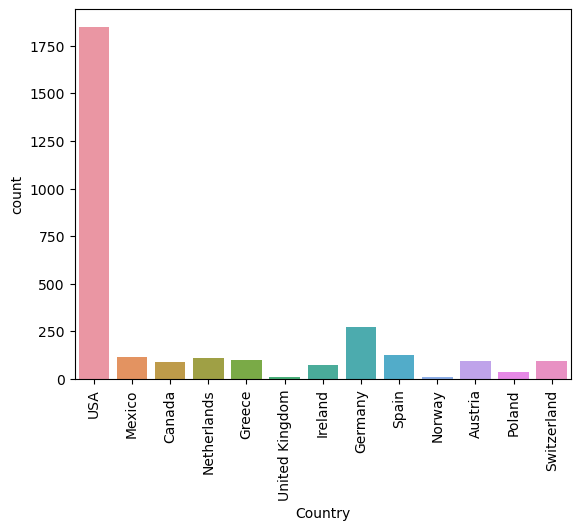

In [74]:
# Visualize the count of Country
print(df['Country'].value_counts(normalize=True)*100)

sns.countplot(x='Country',data=df)
plt.xticks(rotation=90)
plt.show()

We observe that there are 61% data is USA and other are in between 1 to 10% data.

Pets
No     81.348541
Yes    18.651459
Name: proportion, dtype: float64


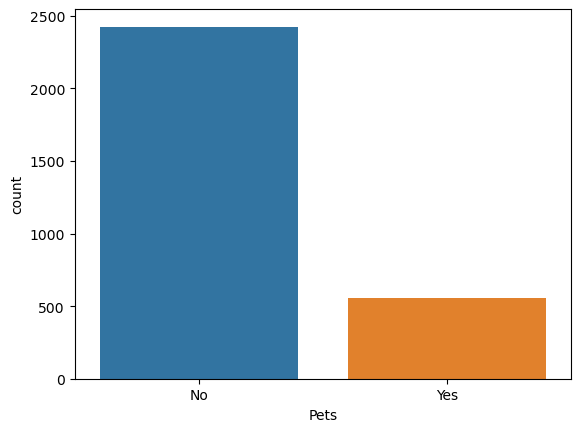

In [75]:
# Visualize the count of Pets
print(df['Pets'].value_counts(normalize=True)*100)

sns.countplot(x='Pets',data=df)
plt.show()

We can observe that 81% property has not allowed pets only 19% are allowed pets.

Washer/Dryer
No     80.845354
Yes    19.154646
Name: proportion, dtype: float64


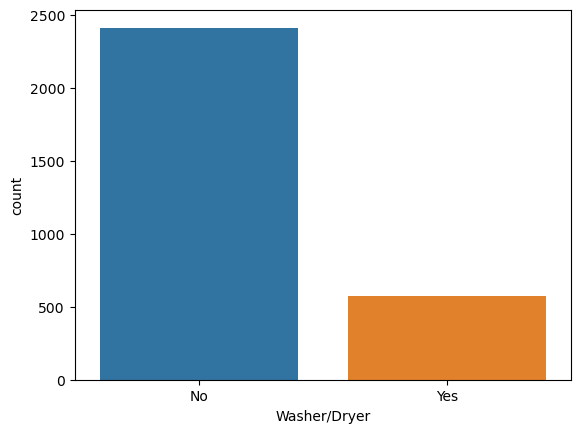

In [76]:
# Visualize the count of Washer/Dryer
print(df['Washer/Dryer'].value_counts(normalize=True)*100)

sns.countplot(x='Washer/Dryer',data=df)
plt.show()

We observe that only 19% rental prpoerty has facility of Washer/Dryer and 80% property has not facility of Washer/Dryer.

Air_Conditioning
No     68.36632
Yes    31.63368
Name: proportion, dtype: float64


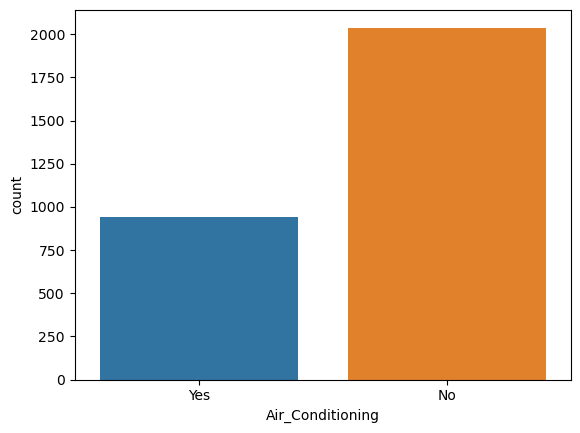

In [77]:
# Visualize the count of Air_Conditioning
print(df['Air_Conditioning'].value_counts(normalize=True)*100)

sns.countplot(x='Air_Conditioning',data=df)
plt.show()

We observe that only 31% rental prpoerty has facility of Air_Conditioning and 68% property has not facility of Air_Conditioning.

Parking
No     66.45421
Yes    33.54579
Name: proportion, dtype: float64


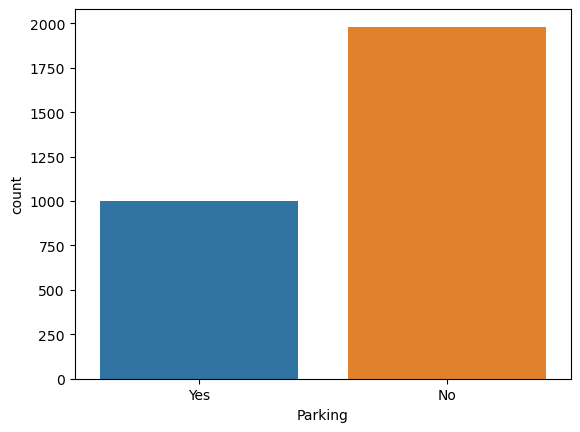

In [78]:
# Visualize the count of Parking
print(df['Parking'].value_counts(normalize=True)*100)

sns.countplot(x='Parking',data=df)
plt.show()

We observe that only 33% rental prpoerty has facility of Parking and 66% property has not facility of Parking.

Fireplace
No     94.297216
Yes     5.702784
Name: proportion, dtype: float64


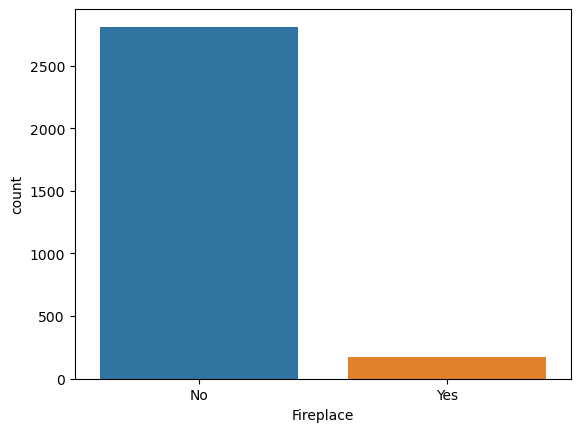

In [79]:
# Visualize the count of Fireplace
print(df['Fireplace'].value_counts(normalize=True)*100)

sns.countplot(x='Fireplace',data=df)
plt.show()

We observe that only 94% rental prpoerty has facility of Fireplace and 6% property has not facility of Fireplace.

Dishwasher
No     63.535726
Yes    36.464274
Name: proportion, dtype: float64


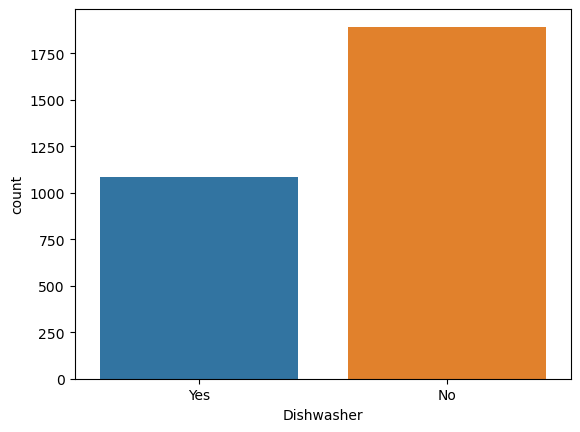

In [80]:
# Visualize the count of Dishwasher
print(df['Dishwasher'].value_counts(normalize=True)*100)

sns.countplot(x='Dishwasher',data=df)
plt.show()

We observe that only 63% rental prpoerty has facility of Dishwasher and 36% property has not facility of Dishwasher.

Hardwood_floor
No     96.645421
Yes     3.354579
Name: proportion, dtype: float64


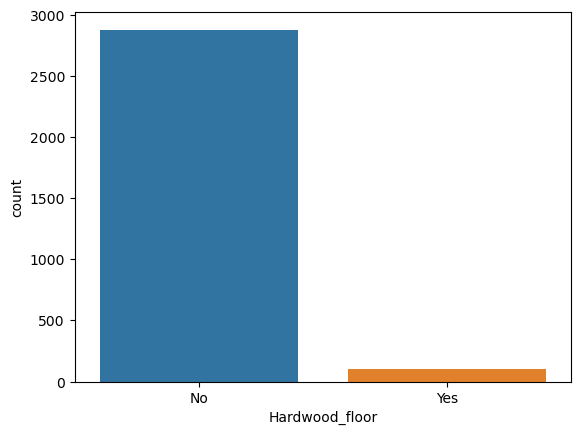

In [81]:
# Visualize the count of Hardwood_floor
print(df['Hardwood_floor'].value_counts(normalize=True)*100)

sns.countplot(x='Hardwood_floor',data=df)
plt.show()

We observe that only 93% rental prpoerty has facility of Hardwood_floor and 3% property has not facility of Hardwood_floor.

Storage
No     95.001677
Yes     4.998323
Name: proportion, dtype: float64


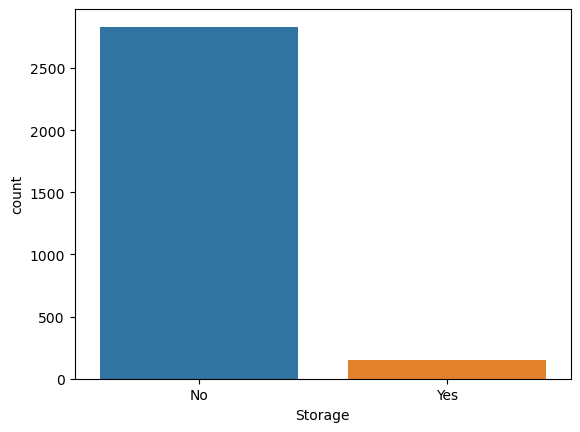

In [82]:
# Visualize the count of Storage
print(df['Storage'].value_counts(normalize=True)*100)

sns.countplot(x='Storage',data=df)
plt.show()

We observe that only 95% rental prpoerty has facility of Storage and 5% property has not facility of Storage.

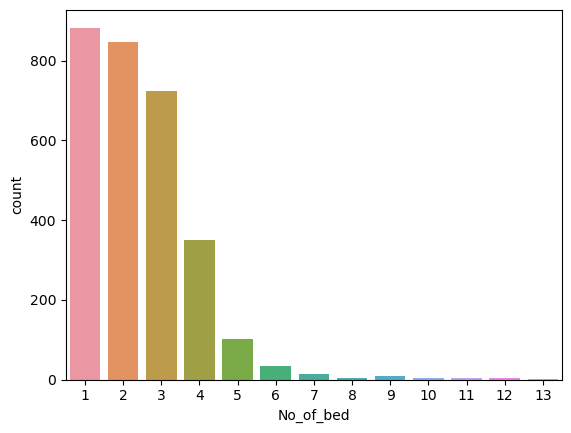

In [83]:
# Visualize the count of No_of_bed
sns.countplot(x='No_of_bed',data=df)
plt.show()

We can observe that those rentel property which has No of bedroom has 1,2,3 is very high and 4 bedroom has median count and more than 4 has not much property for rent.

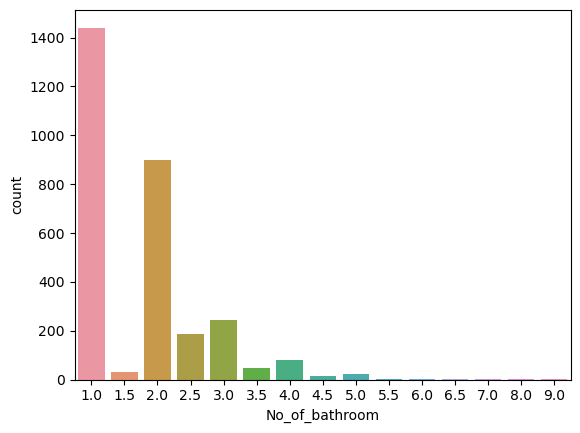

In [84]:
# Visualize the count of No_of_bathroom
sns.countplot(x='No_of_bathroom',data=df)
plt.show()

We can observe that those rentel property which has No of bathroom has 1,2 is very high and and more than 2 has no more much prperty for rent.

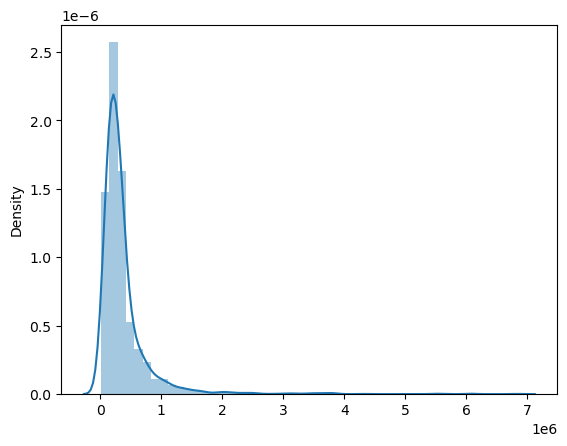

In [85]:
# Let's check how the data has been distributed in Rentel_price columns
sns.distplot(x=df['Rentel_price'])
plt.show()

We see data not looks normal there are skewness present in data.

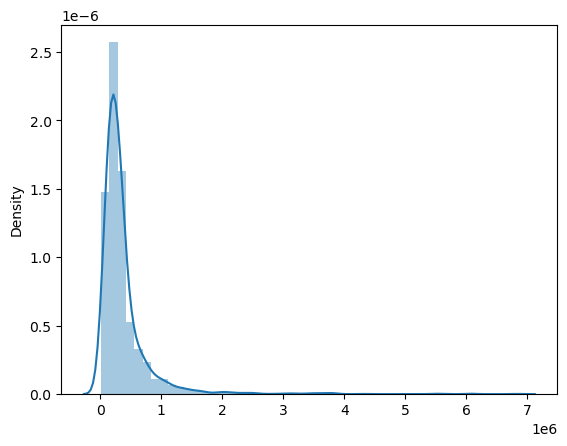

In [86]:
# Let's check how the data has been distributed in Rentel_price columns
sns.distplot(x=df['Rentel_price'])
plt.show()

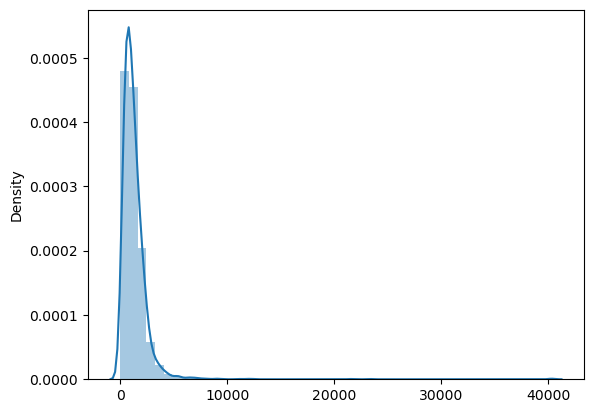

In [87]:
# Let's check how the data has been distributed in Area(sq_ft) columns
sns.distplot(x=df['Area(sq_ft)'])
plt.show()

We see data not looks normal there are skewness present in data.

### Bivariate Analysis

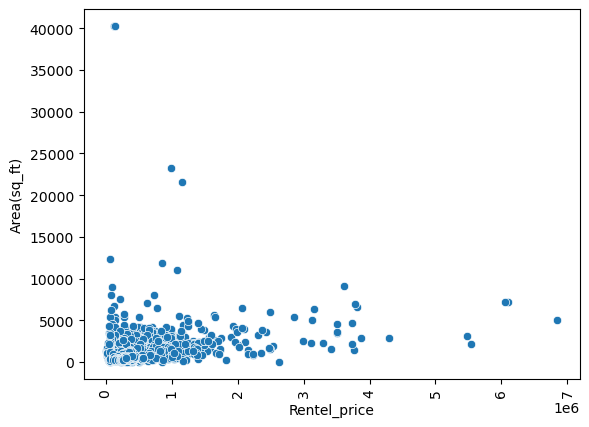

In [88]:
# Let's Comparing Rentel_price vs Area(sq_ft)
sns.scatterplot(x='Rentel_price',y='Area(sq_ft)',data=df)
plt.xticks(rotation=90)
plt.show()

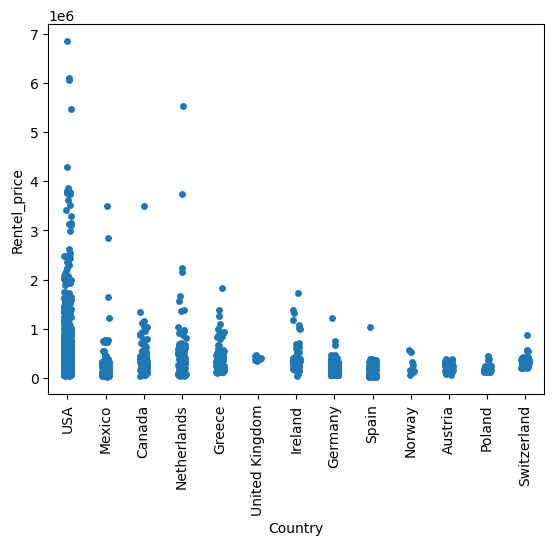

In [89]:
# Let's Comparing Country vs Rentel Price
sns.stripplot(x='Country',y='Rentel_price',data=df)
plt.xticks(rotation=90)
plt.show()

We can observe that USA  the rental price is high than other.

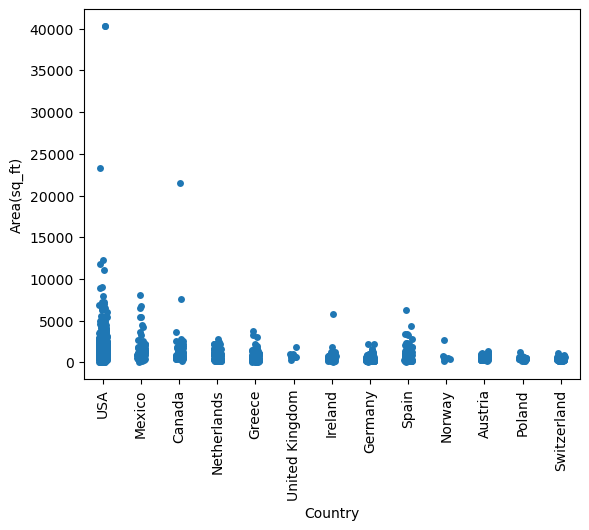

In [90]:
# Let's Comparing Country vs Area(sq_ft)
sns.stripplot(x='Country',y='Area(sq_ft)',data=df)
plt.xticks(rotation=90)
plt.show()

There is not significant different in all the country.

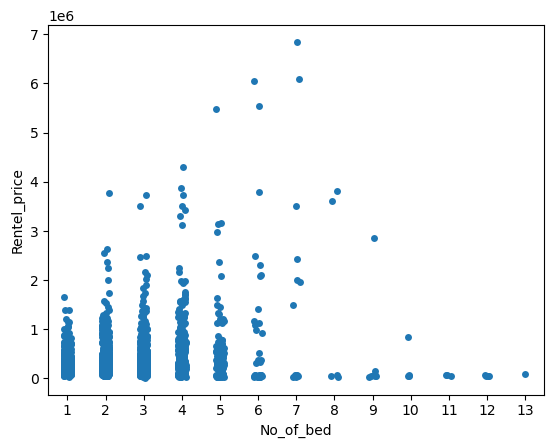

In [91]:
# Let's Comparing No_of_bed vs Rentel_price
sns.stripplot(x='No_of_bed',y='Rentel_price',data=df)
plt.show()

We see that when No of bedroom are increasing than aslo increasing rentel price but more than 8 bedroom  more effect in rentel price.

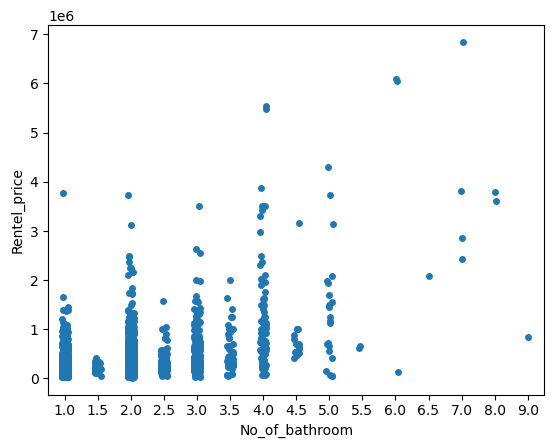

In [92]:
# Let's Comparing No_of_bathroom vs Rentel_price
sns.stripplot(x='No_of_bathroom',y='Rentel_price',data=df)
plt.show()

When no of bathroom are increasing so also rentel price is increasing.

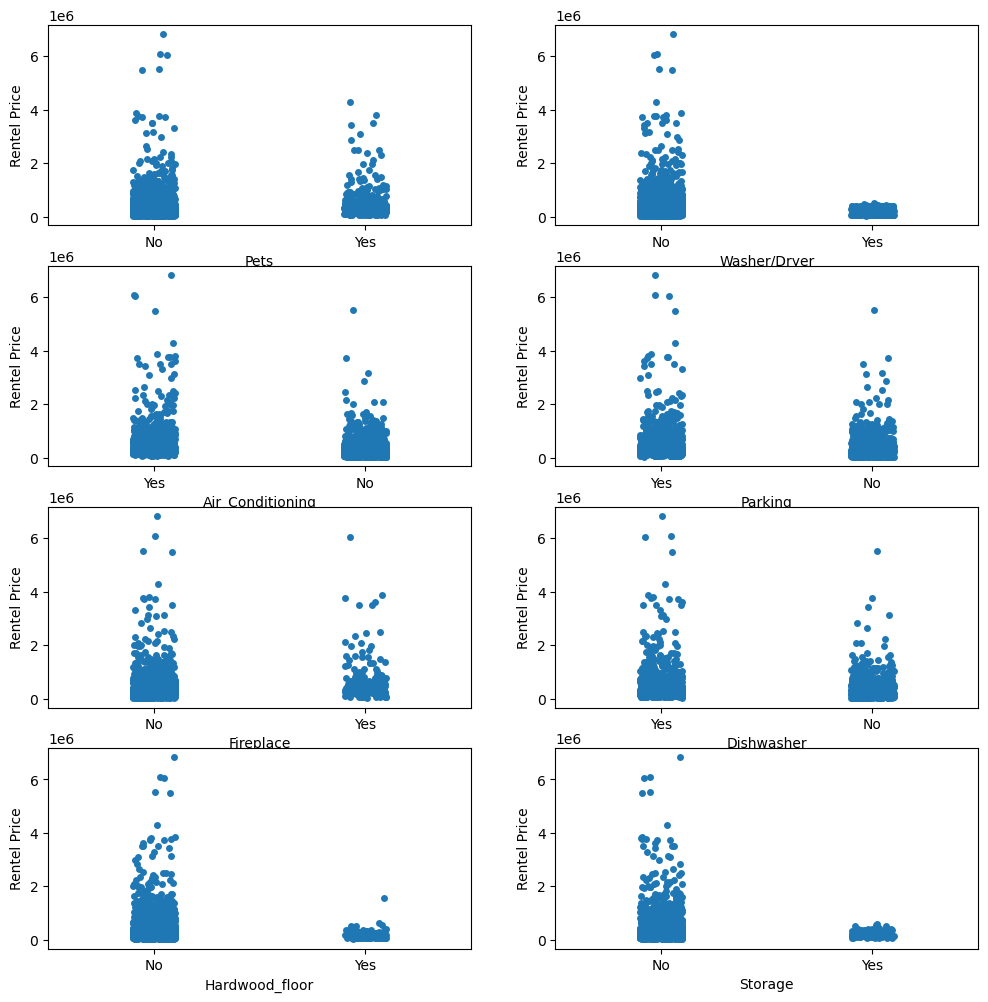

In [93]:
# Visualize categorical columns vs Rentel Price target columns

column = ['Pets','Washer/Dryer','Air_Conditioning','Parking',
          'Fireplace','Dishwasher','Hardwood_floor','Storage']

plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1

for col in column:
    if plotnumber<=10:
        plt.subplot(4,2,plotnumber)
        sns.stripplot(x=col,y='Rentel_price',data=df)
        plt.xlabel(col)
        plt.ylabel('Rentel Price')
    plotnumber+=1
plt.show()

In [94]:
df

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,Las Vegas,USA,2433460,7,7.0,3550.0,No,No,Yes,Yes,No,Yes,No,No
1,Indian Oaks,USA,121092,3,2.0,1352.0,Yes,No,No,No,No,No,No,No
2,Austin,USA,580580,2,2.0,1360.0,No,No,No,No,No,No,No,No
3,Williamson County,USA,199056,3,2.5,1867.0,No,No,No,No,No,No,No,No
4,Travis County,USA,206935,3,2.5,1907.0,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,Zurich,Switzerland,264330,1,1.0,194.0,No,Yes,No,Yes,No,No,No,Yes
2977,Zurich,Switzerland,316382,1,1.0,431.0,Yes,Yes,No,Yes,No,No,No,No
2978,Zurich,Switzerland,866808,1,1.0,237.0,Yes,No,No,No,No,No,No,No
2979,Zurich,Switzerland,547019,1,1.0,344.0,Yes,No,No,No,No,Yes,No,No


### Multivariate anaylsis

<function matplotlib.pyplot.show(close=None, block=None)>

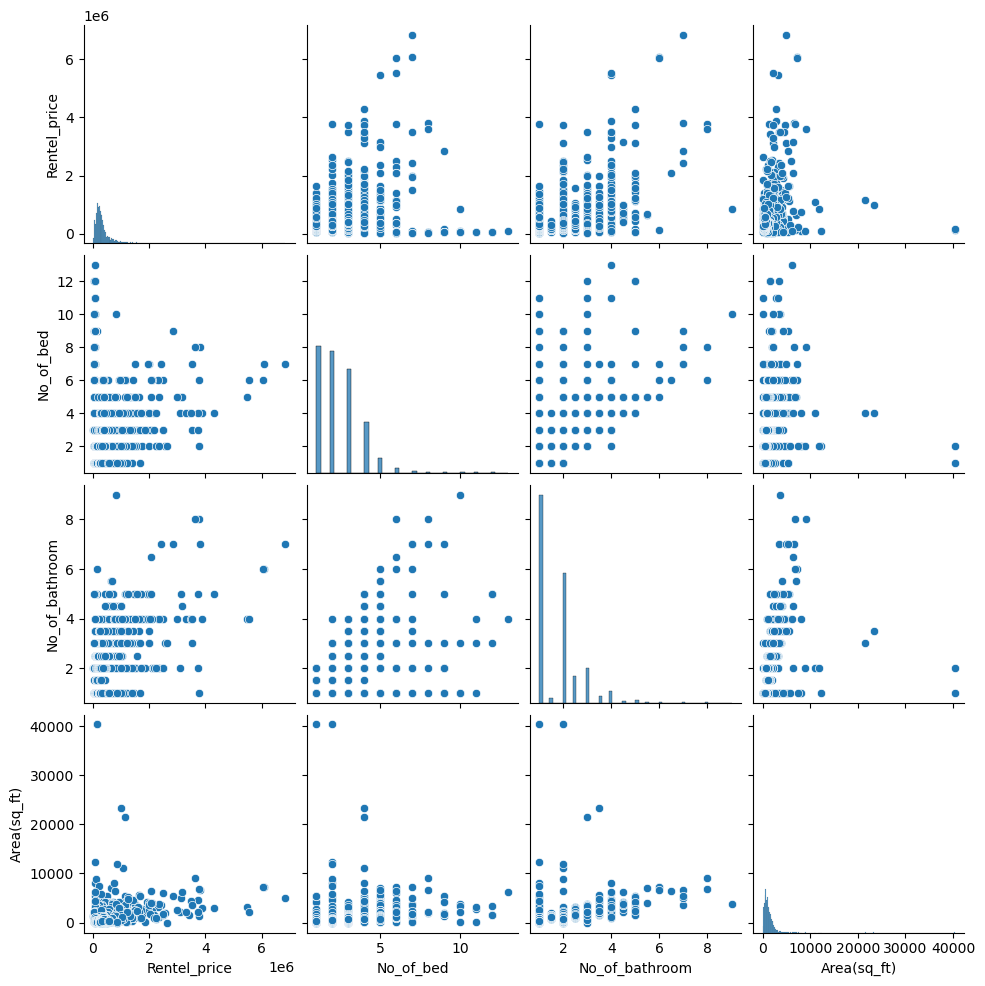

In [95]:
sns.pairplot(df)
plt.show

# First target column
## 1) Predict Rentel_price 

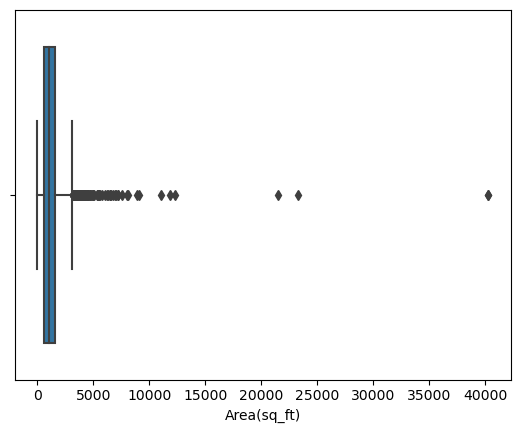

In [96]:
# Checking the outliers
sns.boxplot(x=df['Area(sq_ft)'])
plt.show()

We see the outliers present the the columns.

## Outliers Detection and removel

### Checking outliers using zscore method

In [97]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
df_feature = df[['Area(sq_ft)']]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  2981
New Data Frame -  2958

Data Loss Percentage After removing outliers with zscore method -
  0.7715531700771553


### Checking outliers using IQR method

In [98]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  2981
New Data Frame -  2862

Data Loss Percentage After removing outliers with zscore method -
  3.991949010399195


In [99]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(2958, 14)

We use zscore method because its Loss less data then IQR method.

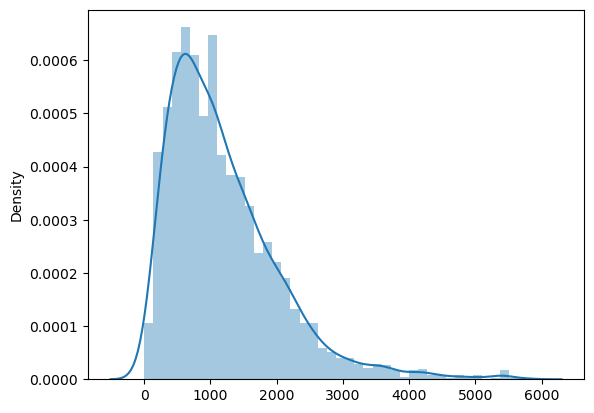

In [100]:
# Checking the distribution of the numerical columns and skewnes
sns.distplot(x = df['Area(sq_ft)'])
plt.show()

The columns has skewness in the data. So we can remove skewness.

## Checking the skewness

In [101]:
df['Area(sq_ft)'].skew()

1.5496230826560216

we see the skewness in the Area column.

### Removing the skewness

In [102]:
# Removeing the skewness using cbrt method
df['Area(sq_ft)'] = np.cbrt(df['Area(sq_ft)'])

0.08092751983802787


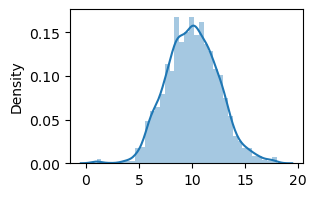

In [103]:
# Checking again the skewness after removing skewness
print(df['Area(sq_ft)'].skew())

# Visualize usign distplot
plt.figure(figsize=(3,2))
sns.distplot(x = df['Area(sq_ft)'])
plt.show()

It is prefect there are not skewness.

## Encoding categorical columns

In [104]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
0,83,11,2433460,7,7.0,15.254903,0,0,1,1,0,1,0,0
1,68,11,121092,3,2.0,11.057550,1,0,0,0,0,0,0,0
2,9,11,580580,2,2.0,11.079317,0,0,0,0,0,0,0,0
3,232,11,199056,3,2.5,12.313498,0,0,0,0,0,0,0,0
4,163,11,206935,3,2.5,12.400815,0,0,0,0,0,0,0,0


In [105]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

City                  int32
Country               int32
Rentel_price          int32
No_of_bed             int32
No_of_bathroom      float64
Area(sq_ft)         float64
Pets                  int32
Washer/Dryer          int32
Air_Conditioning      int32
Parking               int32
Fireplace             int32
Dishwasher            int32
Hardwood_floor        int32
Storage               int32
dtype: object

# Correlation

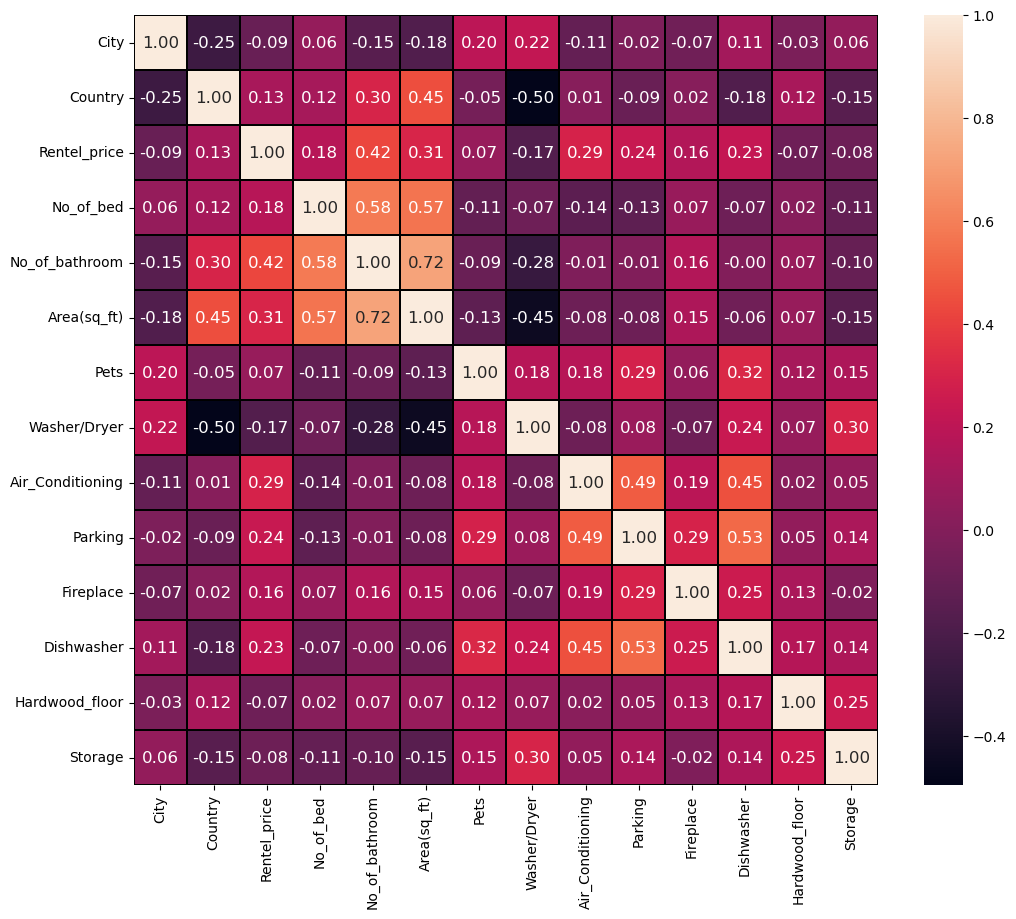

In [106]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

There is no much postive and negative correlation. 

 1. The Area is Postive correlated with No_of_bed.

### Correlation between feature vs target

In [107]:
df_corr['Rentel_price'].drop('Rentel_price').sort_values(ascending=False)

No_of_bathroom      0.423439
Area(sq_ft)         0.305279
Air_Conditioning    0.294206
Parking             0.236646
Dishwasher          0.227362
No_of_bed           0.181167
Fireplace           0.161997
Country             0.125640
Pets                0.068599
Hardwood_floor     -0.070987
Storage            -0.075017
City               -0.093348
Washer/Dryer       -0.170003
Name: Rentel_price, dtype: float64

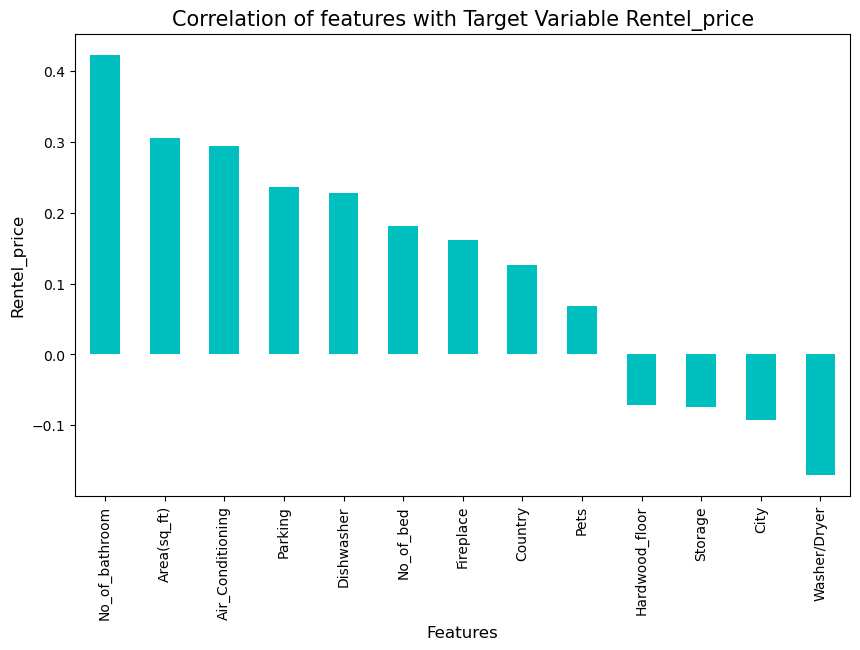

In [108]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Rentel_price'].drop(['Rentel_price']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Rentel_price',fontsize=12)
plt.title('Correlation of features with Target Variable Rentel_price',fontsize = 15)
plt.show()

* Pets and Hardwood_floor features are week or moderately correlated with Rentel_price target variable.
* Maximum correlation of 0.423439 exist between No_of_batroom with Rentel_price taget variable.

## Sparating features and target

In [109]:
x = df.drop(columns=['Rentel_price'],axis=1)
y = df['Rentel_price']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (2958, 13)
Shape of y  (2958,)


## Feature Scaling using Standard Scalarization

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(2958, 13)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [111]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,City,1.204074
1,Country,1.571939
2,No_of_bed,1.867057
3,No_of_bathroom,2.371029
4,Area(sq_ft),3.000148
5,Pets,1.228448
6,Washer/Dryer,1.799232
7,Air_Conditioning,1.561921
8,Parking,1.685280
9,Fireplace,1.180299


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [112]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [113]:
# Find the best ranom state 
maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    y_pred = GBR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.524826484884896  on best random state is 171


### Creating train test split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (2218, 13)
The shape of y_train  (2218,)
The shape of x_test   (740, 13)
The shape of y_test   (740,)


### Applying all Regression Model

In [115]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor()
BC  = BaggingRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [116]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 191421.47299170314
Mean squared error       : 120004463896.19286
Root mean squared error  : 346416.6045330288


R2 Score 
0.33380625099125705
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 161783.25486486487
Mean squared error       : 107435285564.97812
Root mean squared error  : 327773.22276991775


R2 Score 
0.4035828889809464
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 205606.37432432434
Mean squared error       : 208064333762.63724
Root mean squared error  : 456140.69513981894


R2 Score 
-0.15505002100788623
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 190730.99155405405
Mean squared error       : 184654104530.9713
Root mean squared error  : 429713.9799110233


R2 Score 
-0.025090285589307593
*****

## Cross Validation

In [117]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.33380625099125705
Cross Validation Score         : [ 0.31837157  0.28285301  0.27905032  0.22700847 -1.06829885]
Mean of Cross Validation Score : 0.007796904472367361

Different between R2 Score vs Cross Validaton Score : 0.3260093465188897
********************************************************************************

 KNeighbors 

R2 Score                       : 0.4035828889809464
Cross Validation Score         : [ 0.16936235  0.36056274  0.21089264  0.30034138 -2.20261593]
Mean of Cross Validation Score : -0.23229136220031849

Different between R2 Score vs Cross Validaton Score : 0.635874251181265
********************************************************************************

 DecisionTree 

R2 Score                       : -0.05695853561862951
Cross Validation Score         : [ -1.31971395  -0.17796459  -0.76900654   0.07281749 -13.24995785]
Mean of Cross Validation Score : -3.0887650873622903

Different between R2 Score v

#### We can see that GradientBoosting gives less error between accuracy score and CrossValidation.

* R2 Score                       : 0.529657667074992
* Cross Validation Score         : [ 0.34285492  0.37884057  0.24184911  0.27027197 -0.93501554]
* Mean of Cross Validation Score : 0.05976020840001071

* Different between R2 Score vs Cross Validaton Score : 0.4698974586749812

### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with GradientBoosting model

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid =  [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.7,0.5, 0.3, 0.1],
                  'n_estimators' : [100,250,500,750],
                  'max_depth'    : [4,6,8,10,12]}] 

GCV = GridSearchCV(estimator = GBR, param_grid=param_grid, n_jobs = -1)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  GradientBoostingRegressor(learning_rate=0.02, max_depth=10, subsample=0.1)


Best score :  0.36203258880279277


## Final Model

In [119]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred = Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 169604.95792913673
Mean squared error : 102504231510.48433
Root Mean Squared Error: 320162.8203125471


 R2 Score of Final Model :
0.4309571822403174




 Actual Values Vs Predicted Value plot :


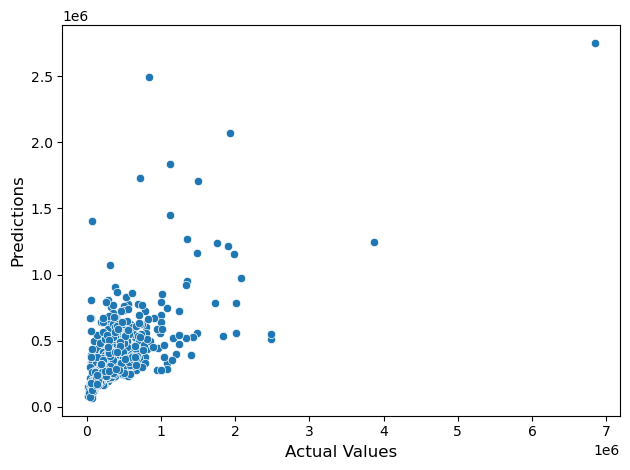

In [120]:
y_pred=Final_mod.predict(x_test)
sns.scatterplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

### Saving Model

In [121]:
import pickle
filename = 'Rentberry_rental_project_Price.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [122]:
import pickle
loaded_model = pickle.load(open('Rentberry_rental_project_Price.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

43.09571822403174


In [123]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
Predicted,226682.71149,208033.782549,310631.831231,235333.973616,319658.890145,207218.57513,271009.936522,330067.903215,369526.375617,483883.65262,...,414406.891982,412767.175528,272264.115649,322751.742284,180256.264071,171264.981318,585509.491542,270384.460435,287167.410856,4.770598e+05
Original,305634.00000,77920.000000,397488.000000,355831.000000,165880.000000,180874.00000,398112.000000,298430.000000,296096.000000,149292.00000,...,373230.000000,405577.000000,244673.000000,194909.000000,56045.000000,139004.000000,418018.000000,305358.000000,391250.000000,1.243685e+06


# Second target column
## 2) Predict Area 

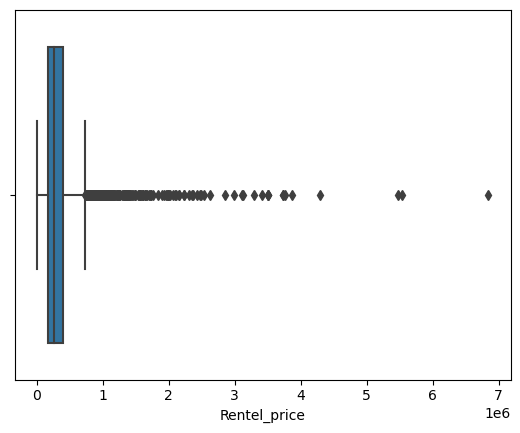

In [124]:
# Checking the outliers
sns.boxplot(x=df['Rentel_price'])
plt.show()

We see the outliers present the the columns.

## Outliers Detection and removel

### Checking outliers using zscore method

In [125]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
df_feature = df[['Rentel_price']]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  2958
New Data Frame -  2908

Data Loss Percentage After removing outliers with zscore method -
  1.6903313049357673


### Checking outliers using IQR method

In [126]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  2958
New Data Frame -  2693

Data Loss Percentage After removing outliers with zscore method -
  8.958755916159568


In [127]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(2908, 14)

We use zscore method because its Loss less data then IQR method.

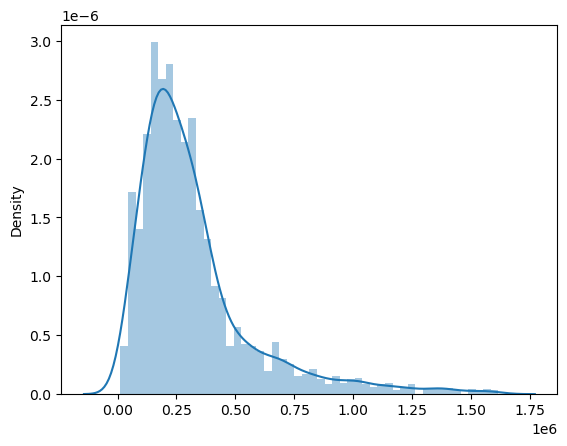

In [128]:
# Checking the distribution of the numerical columns and skewnes
sns.distplot(x = df['Rentel_price'])
plt.show()

The columns has skewness in the data. So we can remove skewness.

## Checking the skewness

In [129]:
df['Rentel_price'].skew()

2.059885389091823

We see the skewness in the Area column.

### Removing the skewness

In [130]:
# Removeing the skewness using cbrt method
from scipy.stats import boxcox
df['Rentel_price'] = np.cbrt(df['Rentel_price'])

0.6239899964613311


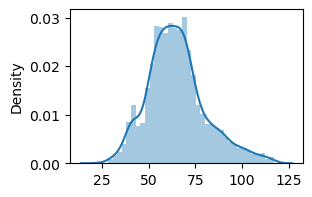

In [131]:
# Checking again the skewness after removing skewness
print(df['Rentel_price'].skew())

# Visualize usign distplot
plt.figure(figsize=(3,2))
sns.distplot(x = df['Rentel_price'])
plt.show()

It is prefect there are not skewness.

## Encoding categorical columns

In [132]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,City,Country,Rentel_price,No_of_bed,No_of_bathroom,Area(sq_ft),Pets,Washer/Dryer,Air_Conditioning,Parking,Fireplace,Dishwasher,Hardwood_floor,Storage
1,68,11,49.473407,3,2.0,11.057550,1,0,0,0,0,0,0,0
2,9,11,83.423298,2,2.0,11.079317,0,0,0,0,0,0,0,0
3,232,11,58.388201,3,2.5,12.313498,0,0,0,0,0,0,0,0
4,163,11,59.148625,3,2.5,12.400815,0,0,0,0,0,0,0,0
5,83,11,41.600136,1,1.0,8.772053,1,0,0,0,0,0,0,0


In [133]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

City                  int32
Country               int32
Rentel_price        float64
No_of_bed             int32
No_of_bathroom      float64
Area(sq_ft)         float64
Pets                  int32
Washer/Dryer          int32
Air_Conditioning      int32
Parking               int32
Fireplace             int32
Dishwasher            int32
Hardwood_floor        int32
Storage               int32
dtype: object

# Correlation

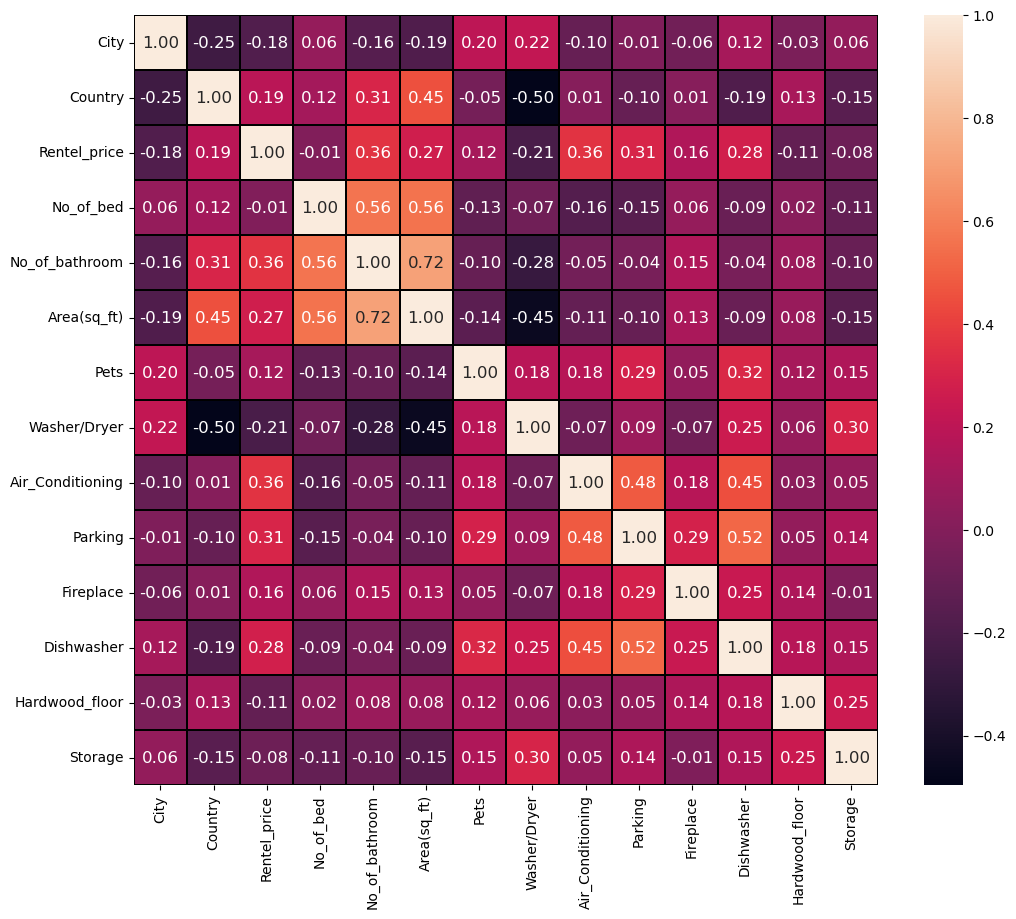

In [134]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

There is no much postive and negative correlation.

### Correlation between feature vs target

In [135]:
df_corr['Area(sq_ft)'].drop('Area(sq_ft)').sort_values(ascending=False)

No_of_bathroom      0.718973
No_of_bed           0.556097
Country             0.452154
Rentel_price        0.273328
Fireplace           0.134299
Hardwood_floor      0.076314
Dishwasher         -0.089554
Parking            -0.103332
Air_Conditioning   -0.105848
Pets               -0.144013
Storage            -0.153419
City               -0.185621
Washer/Dryer       -0.451461
Name: Area(sq_ft), dtype: float64

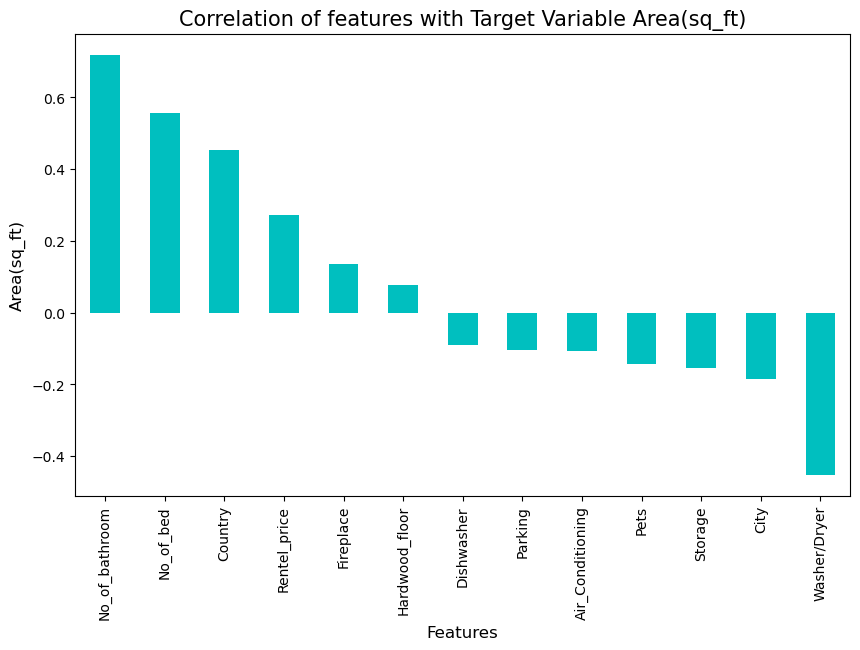

In [136]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Area(sq_ft)'].drop(['Area(sq_ft)']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Area(sq_ft)',fontsize=12)
plt.title('Correlation of features with Target Variable Area(sq_ft)',fontsize = 15)
plt.show()

* Dishwasher and Hardwood_floor features are week or moderately correlated with Area(sq_ft) target variable.
* Maximum correlation of 0.423439 exist between No_of_batroom with Area(sq_ft) taget variable.

## Sparating features and target

In [137]:
x = df.drop(columns=['Area(sq_ft)'],axis=1)
y = df['Area(sq_ft)']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (2908, 13)
Shape of y  (2908,)


## Feature Scaling using Standard Scalarization

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(2908, 13)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [139]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,City,1.206104
1,Country,1.506584
2,Rentel_price,1.659039
3,No_of_bed,1.672282
4,No_of_bathroom,2.099061
5,Pets,1.241452
6,Washer/Dryer,1.626697
7,Air_Conditioning,1.577305
8,Parking,1.695851
9,Fireplace,1.173832


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

### Finding Best Random state

In [140]:
# Find the best ranom state 
maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    y_pred = GBR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.8065576646350148  on best random state is 187


### Creating train test split

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (2181, 13)
The shape of y_train  (2181,)
The shape of x_test   (727, 13)
The shape of y_test   (727,)


### Applying all Regression Model

In [142]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor()
BC  = BaggingRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [143]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 0.9294611149670764
Mean squared error       : 1.6710787047506086
Root mean squared error  : 1.2927020943553116


R2 Score 
0.7151738870913718
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 0.8730133677511344
Mean squared error       : 1.4931501617742478
Root mean squared error  : 1.2219452368147468


R2 Score 
0.7455008220989099
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 0.9574622826040894
Mean squared error       : 1.9183984709879351
Root mean squared error  : 1.385062623489615


R2 Score 
0.6730196022796572
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 0.9711308128080951
Mean squared error       : 2.1940162922103013
Root mean squared error  : 1.4812212165001895


R2 Score 
0.6260420706745089
*********

## Cross Validation

In [144]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.7151738870913718
Cross Validation Score         : [0.31944996 0.69354516 0.64669632 0.44309785 0.22214136]
Mean of Cross Validation Score : 0.46498613085424595

Different between R2 Score vs Cross Validaton Score : 0.2501877562371258
********************************************************************************

 KNeighbors 

R2 Score                       : 0.7455008220989099
Cross Validation Score         : [0.30834071 0.61691097 0.59613751 0.42723144 0.37686934]
Mean of Cross Validation Score : 0.46509799575146005

Different between R2 Score vs Cross Validaton Score : 0.28040282634744984
********************************************************************************

 DecisionTree 

R2 Score                       : 0.7112626083823811
Cross Validation Score         : [-0.11454133  0.47311669  0.44187346  0.02524328 -0.1946222 ]
Mean of Cross Validation Score : 0.12621398100272815

Different between R2 Score vs Cross Validaton 

#### We can see that GradientBoosting  gives less error between accuracy score and CrossValidation.

* R2 Score                       : 0.8063500022076941
* Cross Validation Score         : [0.39249134 0.72263373 0.67880949 0.52804798 0.36618174]
* Mean of Cross Validation Score : 0.5376328572629322

* Different between R2 Score vs Cross Validaton Score : 0.26871714494476195

### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with GradientBoosting model

In [148]:
from sklearn.model_selection import GridSearchCV

param_grid =  [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.7,0.5, 0.3, 0.1],
                  'n_estimators' : [100,250,500,750],
                  'max_depth'    : [4,6,8,10,12]}] 
GCV = GridSearchCV(estimator = GBR, param_grid=param_grid, n_jobs = -1)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.3)


Best score :  0.7140894767141893


## Final Model

In [149]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred = Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.7633070964812115
Mean squared error : 1.101554385427885
Root Mean Squared Error: 1.0495496107511475


 R2 Score of Final Model :
0.8122461540160063




 Actual Values Vs Predicted Value plot :


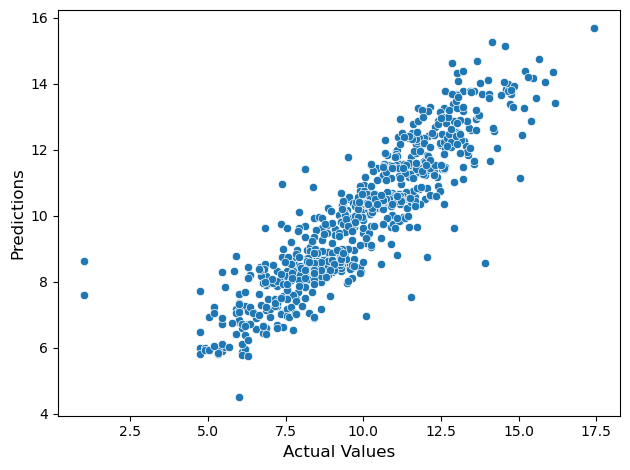

In [150]:
y_pred=Final_mod.predict(x_test)
sns.scatterplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

### Saving Model

In [151]:
import pickle
filename = 'Rentberry_rental_project_Area.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [152]:
import pickle
loaded_model = pickle.load(open('Rentberry_rental_project_Area.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

81.22461540160063


In [153]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,...,717,718,719,720,721,722,723,724,725,726
Predicted,10.583144,12.267575,10.205364,10.369068,7.060712,12.347928,9.968347,11.732040,8.416383,8.896356,...,8.580944,10.431312,7.100038,7.980405,8.508835,10.366691,8.28102,13.552420,8.874355,10.137671
Original,10.800823,13.247715,10.215330,9.774974,7.355762,11.897271,11.287202,11.527972,9.654894,8.396673,...,13.905831,9.864848,5.990726,6.832771,7.080699,10.440327,9.89558,14.052524,9.352286,8.962809
